

### Question 1: What is Anomaly Detection? Explain its types.

Ans:
Anomaly detection is the process of identifying unusual patterns or observations that do not conform to expected behavior.

* Point anomaly: A single data point is different (e.g., one day's temperature = 100°C).
* Contextual anomaly: Unusual in a specific context (e.g., 30°C in winter).
* Collective anomaly: A group of points is unusual (e.g., multiple low readings during peak hours).

### Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor.
Ans:

| Method                     | Approach                          | Use Case                  |
| -------------------------- | --------------------------------- | ------------------------- |
| Isolation Forest           | Random splits to isolate outliers | High-dimensional data     |
| DBSCAN                     | Density-based clustering          | Spatial anomalies         |
| Local Outlier Factor (LOF) | Measures local density deviation  | Detecting local anomalies |

### Question 3: Key Components of a Time Series
Ans:
1. Trend: Long-term growth or decline (e.g., increasing sales yearly).
2. Seasonality: Repeating patterns (e.g., monthly spikes in electricity bills).
3. Residual/Noise: Random fluctuations (e.g., sudden drop due to power outage).

### Question 4: Define Stationarity in Time Series
Ans:
A stationary series has constant mean, variance, and autocorrelation over time.

* Test: Augmented Dickey-Fuller (ADF) test.
* Transformations: Differencing, log transform, moving averages.

### Question 5: AR, MA, ARIMA, SARIMA, SARIMAX Differences
Ans:
| Model   | Description                    | Use Case                       |
| ------- | ------------------------------ | ------------------------------ |
| AR      | AutoRegressive (past values)   | Stock prices, trends           |
| MA      | Moving Average (past errors)   | Noise smoothing                |
| ARIMA   | AR + MA + Differencing (I)     | Non-stationary series          |
| SARIMA  | Seasonal ARIMA                 | Seasonal data (e.g., weather)  |
| SARIMAX | SARIMA + external features (X) | Energy prediction with weather |




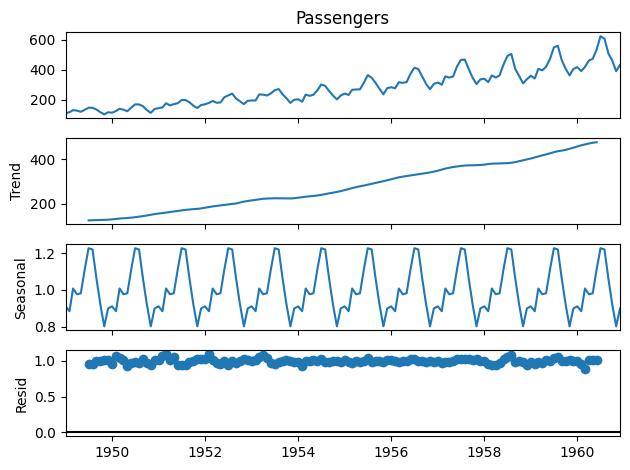

In [4]:
# Q6: Decompose a time series into trend, seasonality, residual
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset from CSV
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.rename(columns={'Passengers': 'Passengers'}, inplace=True)

# Decomposition
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()


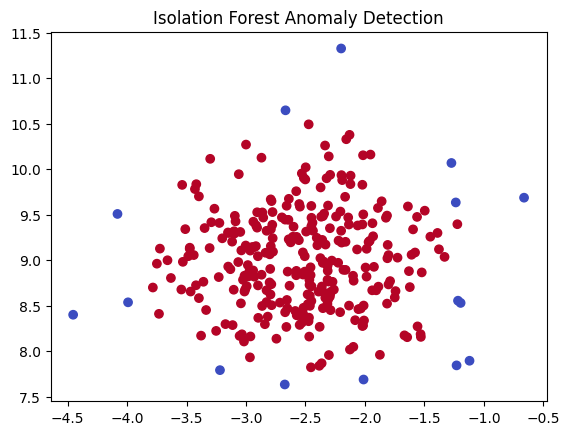

In [5]:
# Q7: Apply Isolation Forest and visualize anomalies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Dummy taxi fare data (for demo)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)
iso = IsolationForest(contamination=0.05)
y_pred = iso.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.show()


c:\Users\prathamesh patrawale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\prathamesh patrawale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


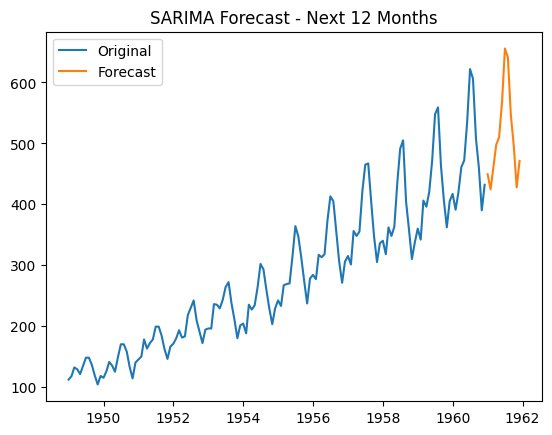

In [6]:
# Q8: SARIMA model to forecast next 12 months
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Train SARIMA
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1]+pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot
plt.plot(data['Passengers'], label='Original')
plt.plot(forecast_series, label='Forecast')
plt.legend()
plt.title("SARIMA Forecast - Next 12 Months")
plt.show()


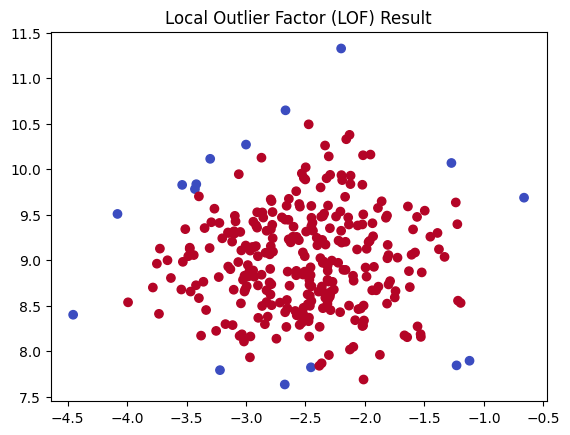

In [7]:
# Q9: LOF anomaly detection
from sklearn.neighbors import LocalOutlierFactor

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Local Outlier Factor (LOF) Result")
plt.show()


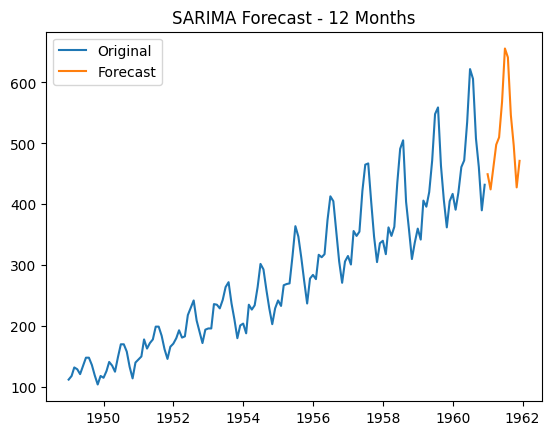

In [15]:
# Q10: Real-time anomaly detection and forecasting strategy


'''
1. Use Isolation Forest or LOF for anomaly detection in real-time streaming data.
2. For forecasting energy demand, use SARIMAX (can include weather as external variable).
3. Validate model with RMSE, MAPE; re
train periodically with new data.
4. Monitoring helps prevent blackouts, optimize grid load, and reduce costs.
'''

# Example SARIMAX model setup using available data
# Here, we use the 'Passengers' column from the 'data' DataFrame without exogenous variables
# Set frequency to avoid ValueWarning
data.index = pd.date_range(start=data.index[0], periods=len(data), freq='MS')

# Now fit SARIMA or SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot
import matplotlib.pyplot as plt
plt.plot(data['Passengers'], label='Original')
plt.plot(forecast_series, label='Forecast')
plt.legend()
plt.title("SARIMA Forecast - 12 Months")
plt.show()
